In [1]:
import numpy as np

import os
import fnmatch
from natsort import natsorted, ns

from matplotlib import image
from matplotlib import pyplot

In [2]:
datasets_path = os.path.join(os.getcwd(), "../Local/datasets/data/")
shapenet_path = os.path.join(datasets_path, "ShapeNet/")
NMR_path = os.path.join(datasets_path, "NMR_Dataset/")

In [3]:
class_id = "02958343"

In [4]:
working_path = os.path.join(NMR_path, class_id)

In [5]:
def list_instance_ids(class_path):
    for f in os.listdir(class_path):
        if os.path.isdir(os.path.join(class_path, f)):
            yield f
def list_image_in_dir(path, ext="png"):
    for f in os.listdir(path):
        if os.path.isfile(os.path.join(path, f)) and not f.startswith('.') and fnmatch.fnmatch(f, '*.{}'.format(ext)):
            yield f

In [7]:
instance_ids = natsorted([f for f in list_instance_ids(working_path)], alg=ns.IGNORECASE)
print("found {} instances".format(len(instance_ids)))

found 7496 instances


In [8]:
print(os.listdir(os.path.join(working_path, instance_ids[0])))
print(os.listdir(os.path.join(working_path, instance_ids[0], "image")))
images = [f for f in list_image_in_dir(os.path.join(working_path, instance_ids[0], "image"))]
print("found {} images".format(len(images)))

['cameras.npz', 'pointcloud.npz', 'image', 'mask', 'visual_hull_depth']
['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png']
found 24 images


In [9]:
def show_images(class_path, instance_id):
    instance_path = os.path.join(class_path, instance_id, "image")
    image_names = natsorted([f for f in list_image_in_dir(instance_path)], alg=ns.IGNORECASE)
    image_paths = [os.path.join(os.path.join(instance_path, f)) for f in image_names]
    n_rows = int(np.sqrt(len(image_names)) + 1)

    for i in range(0, len(image_names)):
        img = image.imread(image_paths[i])
        pyplot.subplot(n_rows, n_rows, 1 + i)
        pyplot.axis("off")
        pyplot.imshow(img)

    pyplot.show()

1a1dcd236a1e6133860800e6696b8284


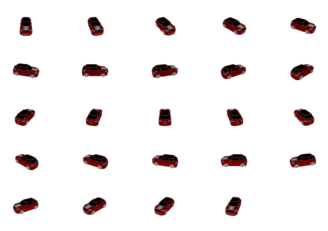

In [27]:
print(instance_ids[2])
show_images(working_path, instance_ids[2])

In [14]:
def camera_path(class_path, instance_id):
    return os.path.join(class_path, instance_id, 'cameras.npz')

In [24]:
with np.load(file=camera_path(working_path, instance_ids[2]), mmap_mode=None, allow_pickle=False, fix_imports=True) as f:
    print(natsorted(list(f.keys()), alg=ns.IGNORECASE))

['camera_mat_0', 'camera_mat_1', 'camera_mat_2', 'camera_mat_3', 'camera_mat_4', 'camera_mat_5', 'camera_mat_6', 'camera_mat_7', 'camera_mat_8', 'camera_mat_9', 'camera_mat_10', 'camera_mat_11', 'camera_mat_12', 'camera_mat_13', 'camera_mat_14', 'camera_mat_15', 'camera_mat_16', 'camera_mat_17', 'camera_mat_18', 'camera_mat_19', 'camera_mat_20', 'camera_mat_21', 'camera_mat_22', 'camera_mat_23', 'camera_mat_inv_0', 'camera_mat_inv_1', 'camera_mat_inv_2', 'camera_mat_inv_3', 'camera_mat_inv_4', 'camera_mat_inv_5', 'camera_mat_inv_6', 'camera_mat_inv_7', 'camera_mat_inv_8', 'camera_mat_inv_9', 'camera_mat_inv_10', 'camera_mat_inv_11', 'camera_mat_inv_12', 'camera_mat_inv_13', 'camera_mat_inv_14', 'camera_mat_inv_15', 'camera_mat_inv_16', 'camera_mat_inv_17', 'camera_mat_inv_18', 'camera_mat_inv_19', 'camera_mat_inv_20', 'camera_mat_inv_21', 'camera_mat_inv_22', 'camera_mat_inv_23', 'world_mat_0', 'world_mat_1', 'world_mat_2', 'world_mat_3', 'world_mat_4', 'world_mat_5', 'world_mat_6', 'w

In [28]:
def load_camera_matrices(class_path, instance_id, id):
    file_path = camera_path(class_path, instance_id)
    with np.load(file_path) as camera_dict:
        Rt = camera_dict['world_mat_inv_%d' % id].astype(np.float32)
        K = camera_dict['camera_mat_%d' % id].astype(np.float32)
    return Rt, K

In [31]:
load_camera_matrices(working_path, instance_ids[2], 2)

(array([[ 5.0000000e-01,  4.3301272e-01, -7.4999988e-01,  2.0490000e+00],
        [ 2.6262098e-08, -8.6602539e-01, -4.9999991e-01,  1.3660001e+00],
        [-8.6602545e-01,  2.5000000e-01, -4.3301257e-01,  1.1829907e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
       dtype=float32),
 array([[3.732051, 0.      , 0.      , 0.      ],
        [0.      , 3.732051, 0.      , 0.      ],
        [0.      , 0.      , 1.      , 0.      ],
        [0.      , 0.      , 0.      , 1.      ]], dtype=float32))

In [25]:
def is_rotation_matrix(R):
    R_t = np.transpose(R)
    R_t_R = np.dot(R_t, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - R_t_R)
    return n < 1e-6

In [33]:
is_rotation_matrix(load_camera_matrices(working_path, instance_ids[2], 2)[0][0:3, 0:3])

True

In [22]:
def rotation_matrix_to_euler_angles(R) :
    if not is_rotation_matrix(R):
        raise ValueError('Input R is not a rotational matrix')
    sy = np.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    singular = sy < 1e-6
    if not singular :
        x = np.arctan2(R[2,1] , R[2,2])
        y = np.arctan2(-R[2,0], sy)
        z = np.arctan2(R[1,0], R[0,0])
    else :
        x = np.arctan2(-R[1,2], R[1,1])
        y = np.arctan2(-R[2,0], sy)
        z = 0
    # RzRyRx = R
    return np.array([x, y, z])

In [34]:
rotation_matrix_to_euler_angles(load_camera_matrices(working_path, instance_ids[2], 2)[0][0:3, 0:3])

array([2.6179938e+00, 1.0471976e+00, 5.2524197e-08], dtype=float32)

p_cam = camera_mat @ world_mat @ scale_mat @ p_world
p_cam = H_world_mat @ p_world
R_world_mat = \[x^camera_world | y^camera_world | z^camera_world\] = R^camera_world
we want the rotation matrix from world to camera
R^world_camera = R_world_mat^-1

it appears that the inv world mat describes the transformation form world coord system
to the camera's coord system

we may assume that the z axis in the camera frame points at the origin of the world frame
and the model is placed at the origin of the world frame

we can verify this be computing the cross product of the third and last columns in Rt, which should be close to zero

In [39]:
def calculate_camera_z_world_origin_match(Rt):
    return np.linalg.norm(np.cross(Rt[:, 2], Rt[:, 3]))

def verify_camera_pose_assumption(Rt, threshold=1e-6):
    return calculate_camera_z_world_origin_match(Rt) < threshold

In [40]:
calculate_camera_z_world_origin_match(load_camera_matrices(working_path, instance_ids[2], 2)[0][0:3, :])

1.3328004e-07

In [41]:
verify_camera_pose_assumption(load_camera_matrices(working_path, instance_ids[2], 2)[0][0:3, :])

True

In [42]:
def verify_pose_in_dataset(class_path, threshold=1e-6):
    total_instances = 0
    failed_instances = 0
    total_poses = 0
    failed_poses = 0
    for instance_id in list_instance_ids(class_path):
        total_instances += 1
        file_path = camera_path(class_path, instance_id)
        # load cameras
        with np.load(file_path, mmap_mode='r') as camera_dict:
            instance_failed = False
            world_inv_mat_keys = natsorted([key for key in camera_dict.keys() if "world_mat_inv" in key], alg=ns.IGNORECASE)
            if len(world_inv_mat_keys) == 0:
                print("instance {} has no world inv matrices!".format(instance_id))
            total_poses += len(world_inv_mat_keys)
            for key in world_inv_mat_keys:
                Rt = camera_dict[key].astype(np.float32)
                dist = calculate_camera_z_world_origin_match(Rt[0:3, :])
                if dist > threshold:
                    instance_failed = True
                    failed_poses += 1
                    print("FAILED: instance {}, pose id {}, mismatch {}".format(instance_id, key, dist))
            failed_instances += 1 if instance_failed else 0
    return total_instances, failed_instances, total_poses, failed_poses

In [43]:
print(working_path)
total_instances, failed_instances, total_poses, failed_poses = verify_pose_in_dataset(working_path)
print("{}/{} instances failed, {}/{} poses failed".format(failed_instances, total_instances, failed_poses, total_poses))

/Volumes/Ed/Thesis/pi-GAN/../Local/datasets/data/NMR_Dataset/02958343
0/7496 instances failed, 0/179904 poses failed
